Loaded 46 raw frames of size, 192 x 1168 (lines x samples)
(46,)
[819 819 704 ...  36  19  19]


Text(0.5, 1.0, 'frame: 0, line: 89, timestamp: 127376077848')

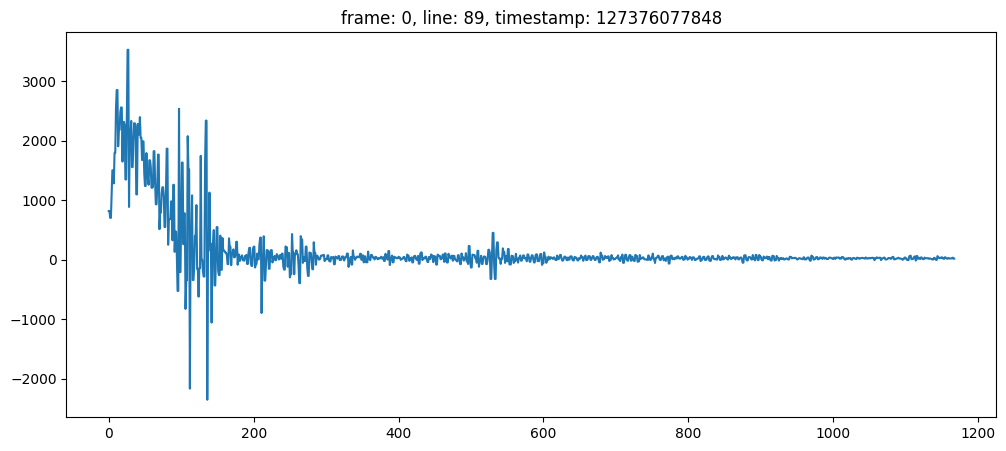

In [4]:
# data is a 3d array 
# 192 x 1168 (lines x samples) (192, 1168, 46) 46 is the number of frames


import numpy as np
import sys
from scipy.signal import hilbert
import matplotlib.pyplot as plt
import objects.rdataread as rd

# locate the path and filename
path = "../data/carotid/"
filename = "test_rf.raw"

# reading header information and RF data
hdr, timestamps, data = rd.read_rf(path + filename)
print(timestamps.shape)
numframes = 1 #hdr['frames']

# covnert RF to B 
bdata = np.zeros((hdr['lines'], hdr['samples'], hdr['frames']), dtype='float')
for frame in range(numframes):
    bdata[:,:,frame] = 20 * np.log10( np.abs(1 + hilbert(data[:,:,frame])) )

# for frame in range(numframes):
#     plt.figure(figsize=(12,5))
#     plt.plot(data[89,:,frame])
#     print(np.transpose(data[89,:,frame]))
#     plt.title(f"frame: {frame}, line: 89, timestamp: {timestamps[frame]}")

frame = 0

plt.figure(figsize=(12,5))
plt.plot(data[89,:,frame])
print(np.transpose(data[89,:,frame]))
plt.title(f"frame: {frame}, line: 89, timestamp: {timestamps[frame]}")


    

# Data viewer

The following script reads and displays different Clarius data types.

## Reading RF data

The following script reads rf data from a file and displays it along with a sample generated b mode image.


In [2]:
# data is a 3d array 
# 192 x 1168 (lines x samples) (192, 1168, 46) 46 is the number of frames


import numpy as np
import sys
from scipy.signal import hilbert
import matplotlib.pyplot as plt
libPath = "../../common/python"
if not libPath in sys.path: sys.path.append(libPath)
import rdataread as rd

# locate the path and filename
path = "../data/carotid/"
filename = "test_rf.raw"

# reading header information and RF data
hdr, timestamps, data = rd.read_rf(path + filename)
print(timestamps)
numframes = 2 #hdr['frames']

Loaded 46 raw frames of size, 192 x 1168 (lines x samples)
[127376077848 127523005109 127669233951 127814169067 127980914164
 128136193218 128309191715 128465015243 128605596764 128751576897
 128894746952 129036825364 129181107279 129327370922 129472701352
 129618354570 129767897734 129914133813 130087242122 130259600146
 130405965825 130549304419 130696397328 130843656789 130989316680
 131134217571 131281296746 131426669947 131573384613 131737209850
 131904669983 132055678892 132201708904 132351011244 132514393941
 132676770298 132833925105 132983959705 133130123935 133275781190
 133418831687 133592316990 133754514408 133907704493 134086269323
 134237965741]


In [41]:
# data is a 3d array 
# 192 x 1168 (lines x samples) (192, 1168, 46) 46 is the number of frames


import numpy as np
import sys
from scipy.signal import hilbert
import matplotlib.pyplot as plt
libPath = "../../common/python"
if not libPath in sys.path: sys.path.append(libPath)
import objects.rdataread as rd

# locate the path and filename
path = "../data/carotid/"
filename = "data/raw_data/test_rf.raw"

# reading header information and RF data
hdr, timestamps, data = rd.read_rf(filename)
print(timestamps.shape)
numframes = 2 #hdr['frames']
print(max(data))
# covnert RF to B 
bdata = np.zeros((hdr['lines'], hdr['samples'], hdr['frames']), dtype='float')
for frame in range(numframes):
    bdata[:,:,frame] = 20 * np.log10( np.abs(1 + hilbert(data[:,:,frame])) )
print(max(bdata))
# display images
for frame in range(numframes):
    print(data[:,:,frame])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(np.transpose(data[:,:,frame]), cmap=plt.cm.plasma, aspect='auto', vmin=-1000, vmax=1000 )
    plt.title('RF frame ' + str(frame) + str(timestamps[frame]))
    plt.subplot(1,2,2)
    plt.imshow(np.transpose(bdata[:,:,frame]), cmap=plt.cm.gray, aspect='auto', vmin=15, vmax=70 )
    plt.title('sample B frame ' + str(frame))
    plt.show()
    

Loaded 24 raw frames of size, 192 x 1040 (lines x samples)
(24,)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Loaded 13 raw frames of size, 192 x 3120 (lines x samples)


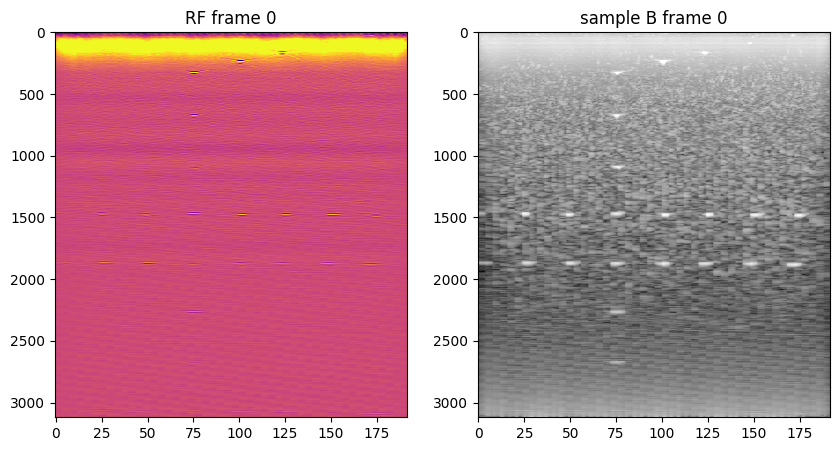

In [33]:
import numpy as np
import sys
from scipy.signal import hilbert
import matplotlib.pyplot as plt
libPath = "../../common/python"
if not libPath in sys.path: sys.path.append(libPath)
import rdataread as rd

# locate the path and filename
path = "../data/wirephantom/"
filename = "phantom_rf.raw"

# reading header information and RF data
hdr, timestamps, data = rd.read_rf(path + filename)
numframes = 1 #hdr['frames']

# covnert RF to B 
bdata = np.zeros((hdr['lines'], hdr['samples'], hdr['frames']), dtype='float')
for frame in range(numframes):
    bdata[:,:,frame] = 20 * np.log10( np.abs(1 + hilbert(data[:,:,frame])) )

# display images
for frame in range(numframes):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(np.transpose(data[:,:,frame]), cmap=plt.cm.plasma, aspect='auto', vmin=-1000, vmax=1000 )
    plt.title('RF frame ' + str(frame))
    plt.subplot(1,2,2)
    plt.imshow(np.transpose(bdata[:,:,frame]), cmap=plt.cm.gray, aspect='auto', vmin=15, vmax=70 )
    plt.title('sample B frame ' + str(frame))
    plt.show()

## Reading IQ data

The following script reads sample IQ data from a file and displays the results along with sample b mode image.

In [3]:
# read iq data
path = "../data/wirephantom/"
filename = "phantom_iq.raw"
hdr, timestamps, data = rd.read_iq(path + filename)
# separating i and q data
idata = data[:,0::2,:]
qdata = data[:,1::2,:]    

# covnert IQ to B 
numframes = 1 #hdr['frames']
bdata = np.zeros((hdr['lines'], hdr['samples'], hdr['frames']), dtype='float')
for frame in range(numframes):
    bdata[:,:,frame] = 10 * np.log10(1 + np.power(idata[:,:,frame], 2) + np.power( qdata[:,:,frame], 2)  )

# display images
for frame in range(numframes):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(np.transpose(idata[:,:,frame]), cmap=plt.cm.viridis, aspect='auto', vmin=-100, vmax=100 )
    plt.title('I frame ' + str(frame))
    plt.subplot(1,3,2)
    plt.imshow(np.transpose(qdata[:,:,frame]), cmap=plt.cm.viridis, aspect='auto', vmin=-100, vmax=100 )
    plt.title('Q frame ' + str(frame))
    plt.subplot(1,3,3)
    plt.imshow(np.transpose(bdata[:,:,frame]), cmap=plt.cm.gray, aspect='auto', vmin=15, vmax=70 )
    plt.title('sample B frame ' + str(frame))
    plt.show()
    

NameError: name 'rd' is not defined

## Reading envelope data

The following script reads sample B/envelope data from a file and store them into memory.


In [18]:
# read b/envelope data
import numpy as np
import sys
from scipy.signal import hilbert
import matplotlib.pyplot as plt
import objects.rdataread as rd

path = "../data/"
filename = "data/raw_data/test_env.raw"
hdr, timestamps, data = rd.read_env(filename)

print(data.shape)
# display b data
# numframes = 1 #hdr['frames']
# for frame in range(numframes):
#     plt.figure(figsize=(5,5))
#     plt.imshow(np.transpose(data[:,:,frame]), cmap=plt.cm.gray, aspect='auto', vmin=0, vmax=255 )
#     plt.title('envelope frame ' + str(frame))
#     plt.show()   
# x = np.transpose(data[:,:,1])
# print(data[:,:,1].shape)
print(data.shape)

Loaded 75 raw frames of size, 384 x 784 (lines x samples)
(384, 784, 75)
(384, 784, 75)


Loaded 24 raw frames of size, 192 x 1040 (lines x samples)
Loaded 75 raw frames of size, 384 x 784 (lines x samples)


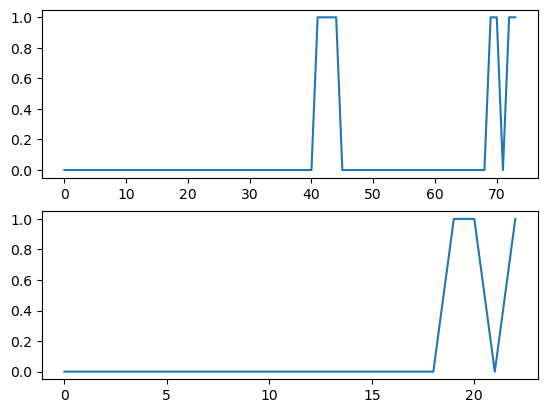

In [53]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy.signal import hilbert
import objects.rdataread as rd

# locate the path and filename
filename = "data/raw_data/test_rf.raw"

# reading header information and RF data
hdr, timestamps, data = rd.read_rf(filename)

# covnert RF to B 
bdata = np.zeros((hdr['lines'], hdr['samples'], hdr['frames']), dtype='float')
for frame in range(data.shape[2]):
    bdata[:,:,frame] = 20 * np.log10( np.abs(1 + hilbert(data[:,:,frame])) )

filename = "data/raw_data/test_env.raw"
hdr2, timestamps2, data2 = rd.read_env(filename)

# movement_results = []
# threshold = 75


# diff_images = []  # Store difference images

# Iterate over the frames to detect movement
def move(the_data, threshold):

    movement_results = []
    diff_images = [] 
    # threshold = 75
    for i in range(1, the_data.shape[2]):
        # Calculate absolute difference between consecutive frames
        diff = cv2.absdiff(the_data[:,:,i - 1], the_data[:,:,i])

        # Apply a threshold to the difference image
        _, thresholded = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)

        # Check if there are non-zero pixels (movement) in the thresholded image
        movement_detected = np.any(thresholded)
        movement_results.append(movement_detected)

        # Store the difference image
        diff_images.append(diff)

    return movement_results

fig, ax = plt.subplots(2,1)

ax[0].plot(move(data2, 175))
ax[1].plot(move(bdata, 69))

# Plot the movement detection results
# plt.plot(move(data2, 175))
# plt.xlabel('Frame')
# plt.ylabel('Movement Detected')
# plt.title('Movement Detection Results')

# plt.plot(move(bdata, 75))
# plt.xlabel('Frame')
# plt.ylabel('Movement Detected')
# plt.title('Movement Detection Results')
# plt.show()

# for x in range(len(movement_results)):
#     if movement_results[x] > 0:
#         print(x)


Loaded 75 raw frames of size, 384 x 784 (lines x samples)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)
(384, 784)


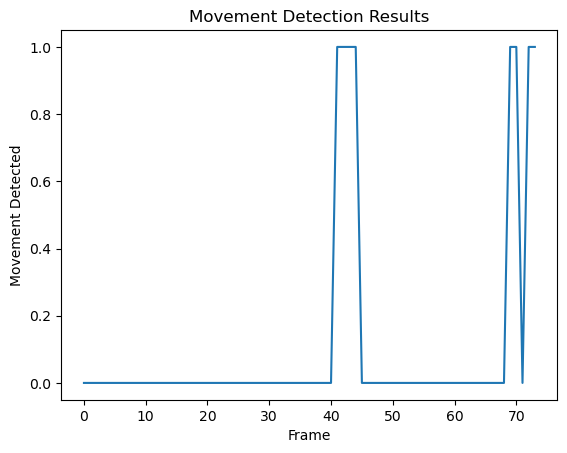

41
42
43
44
69
70
72
73


In [46]:
import cv2
import matplotlib.pyplot as plt
#psnr
movement_results = []
threshold = 175

filename = "data/raw_data/test_env.raw"
hdr, timestamps, data = rd.read_env(filename)

diff_images = []  # Store difference images

# Iterate over the frames to detect movement
for i in range(1, data.shape[2]):
    # Calculate absolute difference between consecutive frames
    diff = cv2.absdiff(data[:,:,i - 1], data[:,:,i])
    print(diff.shape)
    # Apply a threshold to the difference image
    _, thresholded = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)

    # Check if there are non-zero pixels (movement) in the thresholded image
    movement_detected = np.any(thresholded)
    movement_results.append(movement_detected)

    # Store the difference image
    diff_images.append(diff)

# Plot the movement detection results
plt.plot(movement_results)
plt.xlabel('Frame')
plt.ylabel('Movement Detected')
plt.title('Movement Detection Results')
plt.show()
for x in range(len(movement_results)):
    if movement_results[x] > 0:
        print(x)
 

Loaded 75 raw frames of size, 384 x 784 (lines x samples)


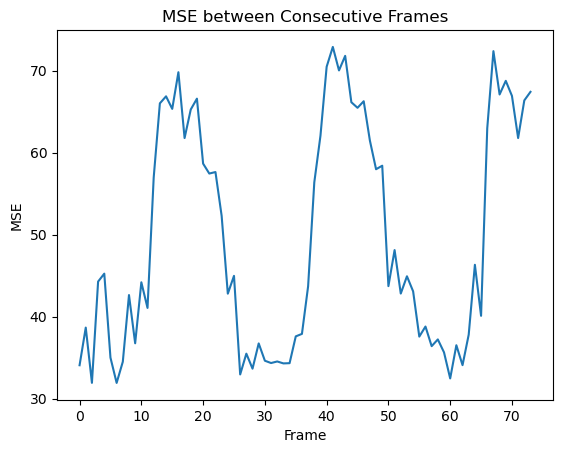

In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the video
filename = "data/raw_data/test_env.raw"
hdr, timestamps, data = rd.read_env(filename)

mse_results = []  # Store MSE values

# Iterate over the frames to detect movement
for i in range(1, data.shape[2]):
    # Calculate MSE between consecutive frames
    mse = np.mean((data[:,:,i - 1] - data[:,:,i]) ** 2)
    mse_results.append(mse)

# Plot the MSE results
plt.plot(mse_results)
plt.xlabel('Frame')
plt.ylabel('MSE')
plt.title('MSE between Consecutive Frames')
plt.show()

Loaded 24 raw frames of size, 192 x 1040 (lines x samples)


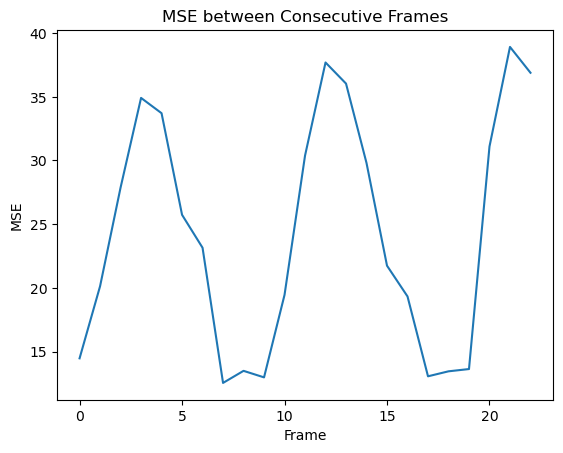

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert
import objects.rdataread as rd

# locate the path and filename
filename = "data/raw_data/test_rf.raw"

# reading header information and RF data
hdr, timestamps, data = rd.read_rf(filename)

# covnert RF to B 
bdata = np.zeros((hdr['lines'], hdr['samples'], hdr['frames']), dtype='float')
for frame in range(data.shape[2]):
    bdata[:,:,frame] = 20 * np.log10( np.abs(1 + hilbert(data[:,:,frame])) )


mse_results = []  # Store MSE values

# Iterate over the frames to detect movement
for i in range(1, bdata.shape[2]):
    # Calculate MSE between consecutive frames
    mse = np.mean((bdata[:,:,i - 1] - bdata[:,:,i]) ** 2)
    mse_results.append(mse)

# Plot the MSE results
plt.plot(mse_results)
plt.xlabel('Frame')
plt.ylabel('MSE')
plt.title('MSE between Consecutive Frames')
plt.show()

Loaded 24 raw frames of size, 192 x 1040 (lines x samples)


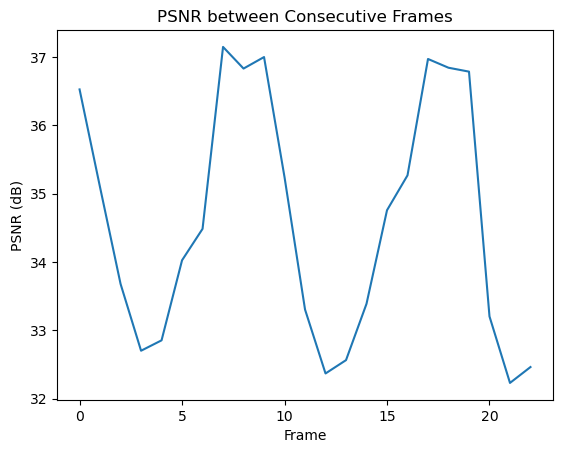

In [59]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert
import objects.rdataread as rd

# locate the path and filename
filename = "data/raw_data/test_rf.raw"

# reading header information and RF data
hdr, timestamps, data = rd.read_rf(filename)

# covnert RF to B 
bdata = np.zeros((hdr['lines'], hdr['samples'], hdr['frames']), dtype='float')
for frame in range(data.shape[2]):
    bdata[:,:,frame] = 20 * np.log10( np.abs(1 + hilbert(data[:,:,frame])) )


psnr_results = []  # Store PSNR values

# Iterate over the frames to detect movement
for i in range(1, bdata.shape[2]):
    # Calculate PSNR between consecutive frames
    psnr = cv2.PSNR(bdata[:,:,i - 1], bdata[:,:,i])
    psnr_results.append(psnr)

# Plot the PSNR results
plt.plot(psnr_results)
plt.xlabel('Frame')
plt.ylabel('PSNR (dB)')
plt.title('PSNR between Consecutive Frames')
plt.show()

Loaded 75 raw frames of size, 384 x 784 (lines x samples)


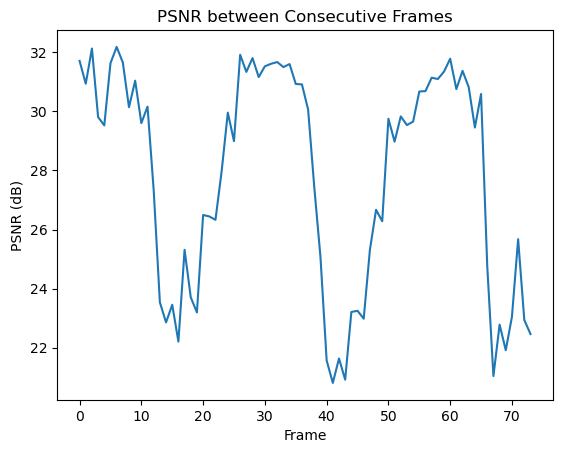

In [61]:
# Load the video
filename = "data/raw_data/test_env.raw"
hdr, timestamps, data = rd.read_env(filename)

psnr_results = []  # Store PSNR values

# Iterate over the frames to detect movement
for i in range(1, data.shape[2]):
    # Calculate PSNR between consecutive frames
    psnr = cv2.PSNR(data[:,:,i - 1], data[:,:,i])
    psnr_results.append(psnr)

# Plot the PSNR results
plt.plot(psnr_results)
plt.xlabel('Frame')
plt.ylabel('PSNR (dB)')
plt.title('PSNR between Consecutive Frames')
plt.show()

Loaded 24 raw frames of size, 192 x 1040 (lines x samples)
(24,)
[1319  682  198 ...   36   33   27]
[1322  689  192 ...   20    6   49]
[1321  683  201 ...   23    5   25]
[1169  712  222 ...   14   -5    1]
[1111  410  441 ...   15    9    0]
[1326  344  429 ...   18   50   31]
[1285  350  429 ...   11   32   22]
[1288  361  419 ...   14   16   12]
[1285  370  423 ...   23   17   23]
[1290  383  410 ...   10   14   38]
[1298  393  412 ...   23    9   22]
[1302  401  407 ...    7   19   18]
[1243  434  406 ...   23   35   23]
[1211   88  701 ...   39   53   34]
[1247  106  610 ...   15   26   23]
[1248  157  573 ...   10   37   12]
[1274  157  564 ...   12   44    9]
[1267  167  563 ...   34   34   35]
[1278  160  563 ...    5   35   34]
[1277  166  553 ...  -12   13   18]
[1282  169  553 ...   27   18   18]
[1288  188  549 ...   21   33   30]
[951  80 734 ...  11  14  19]
[1013   11  678 ...   48   11   15]


C:\Users\codyh\AppData\Local\Temp\ipykernel_36652\2380512896.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12,5))


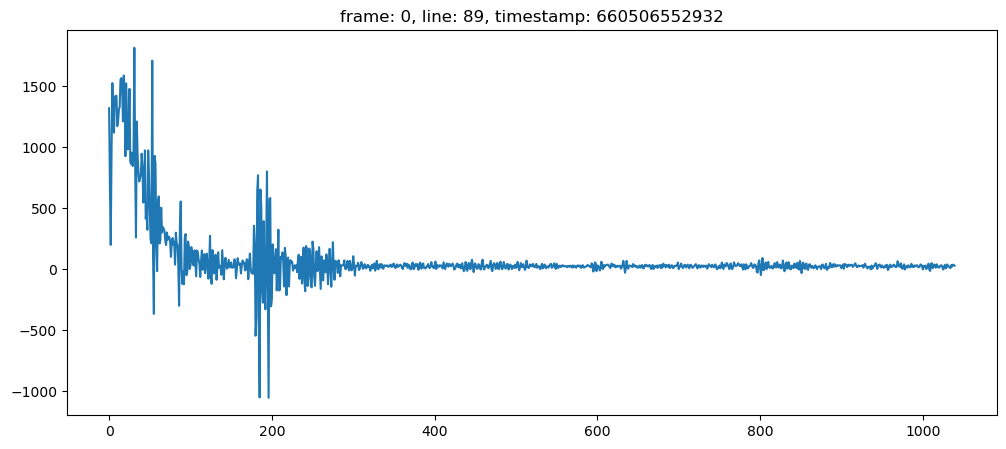

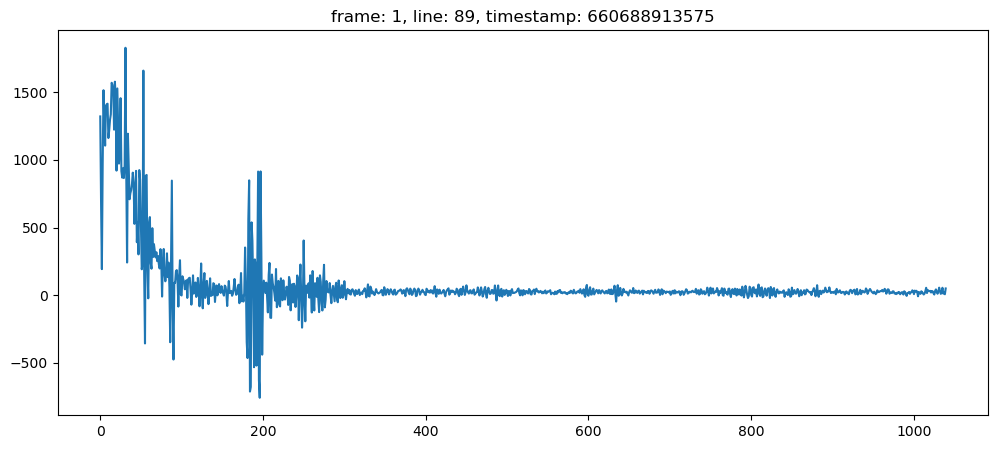

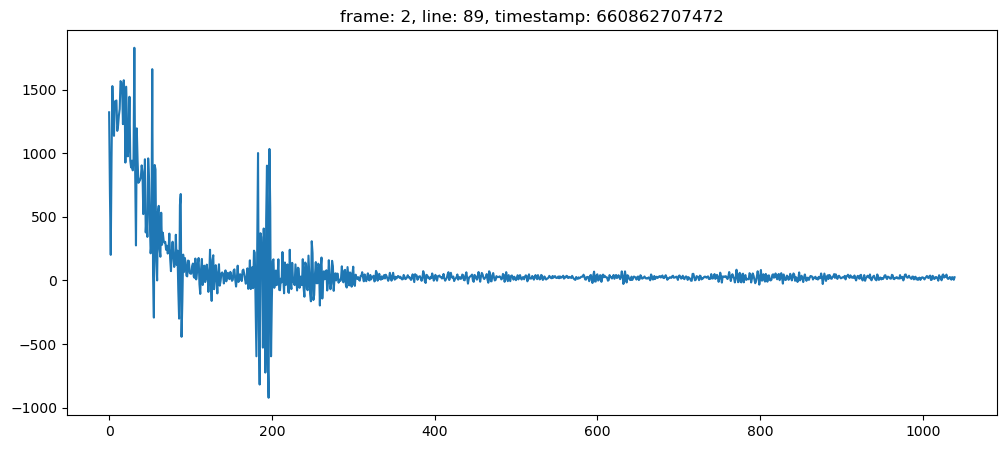

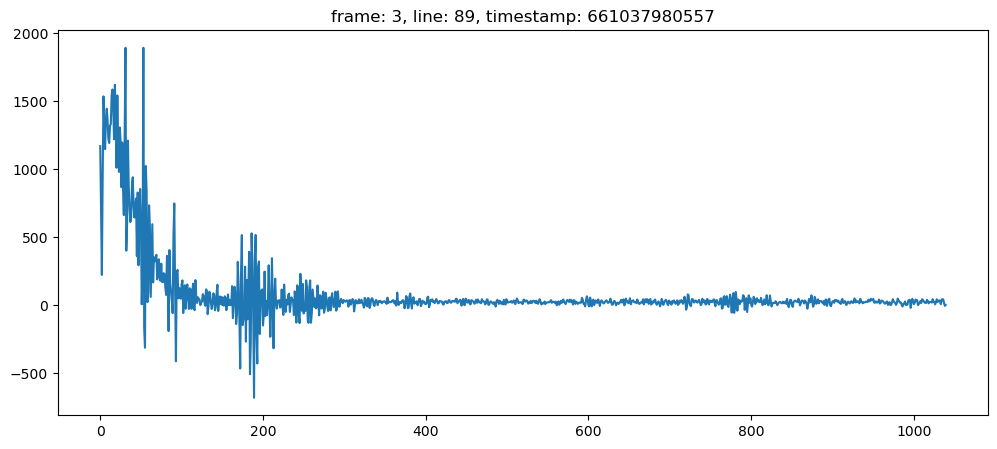

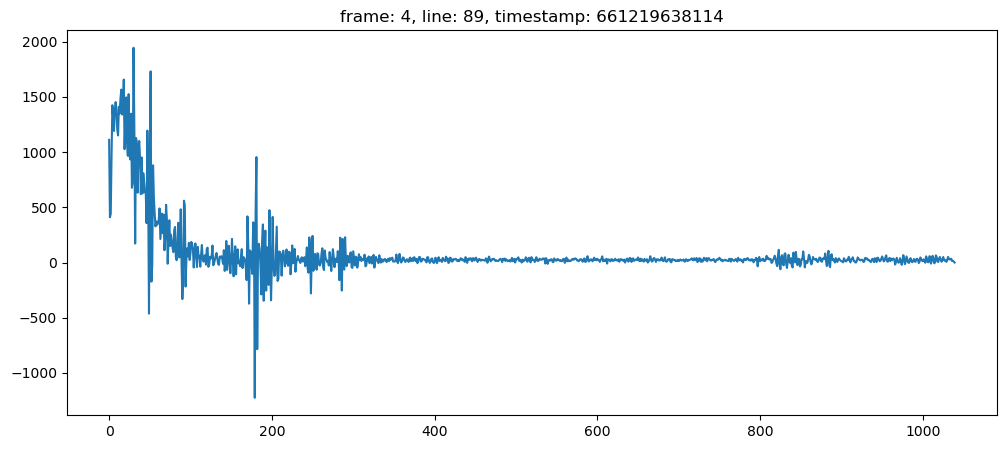

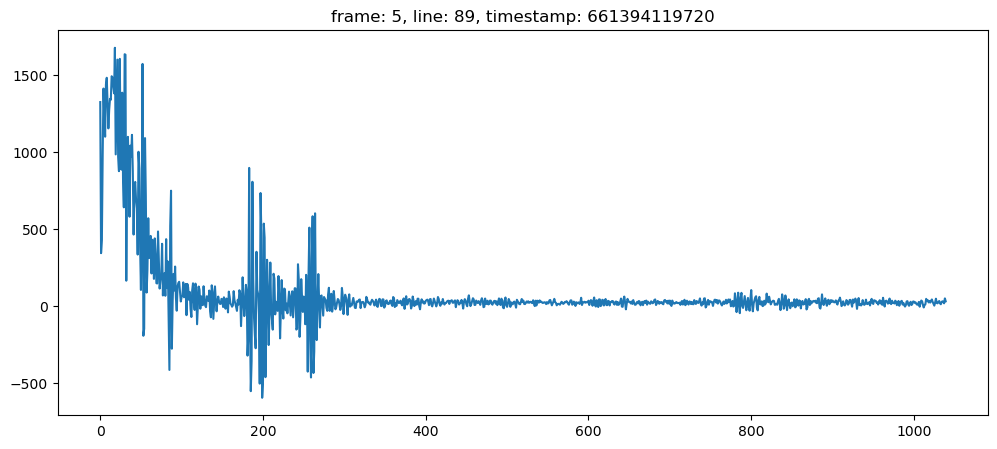

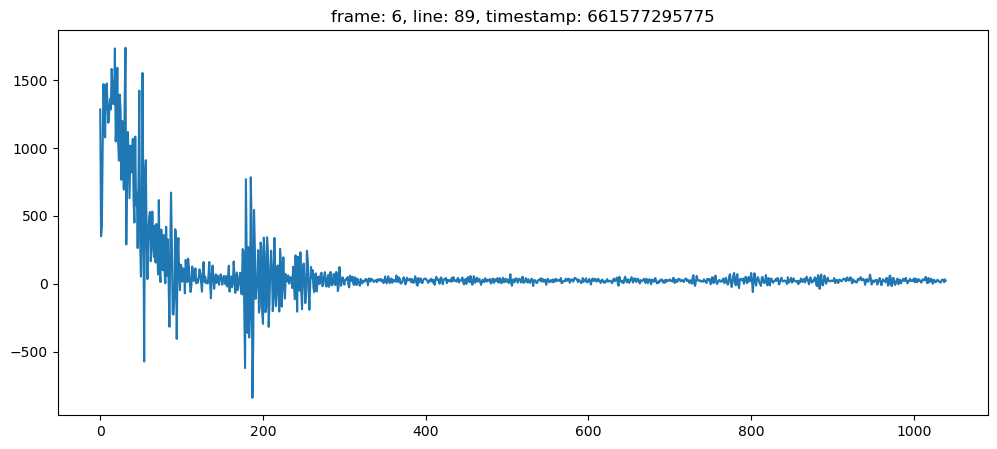

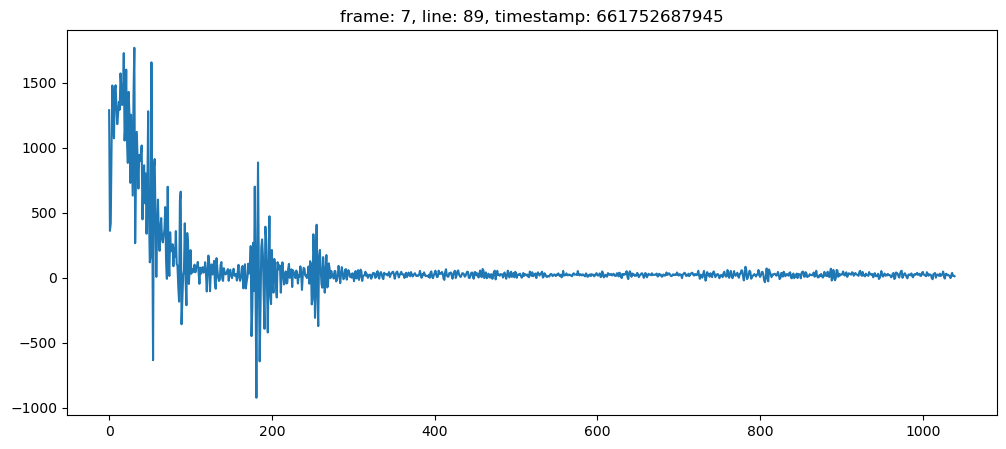

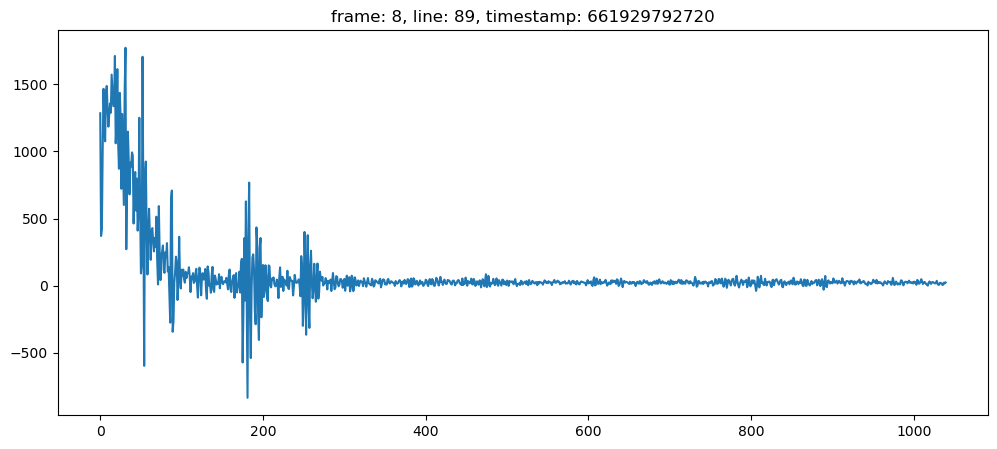

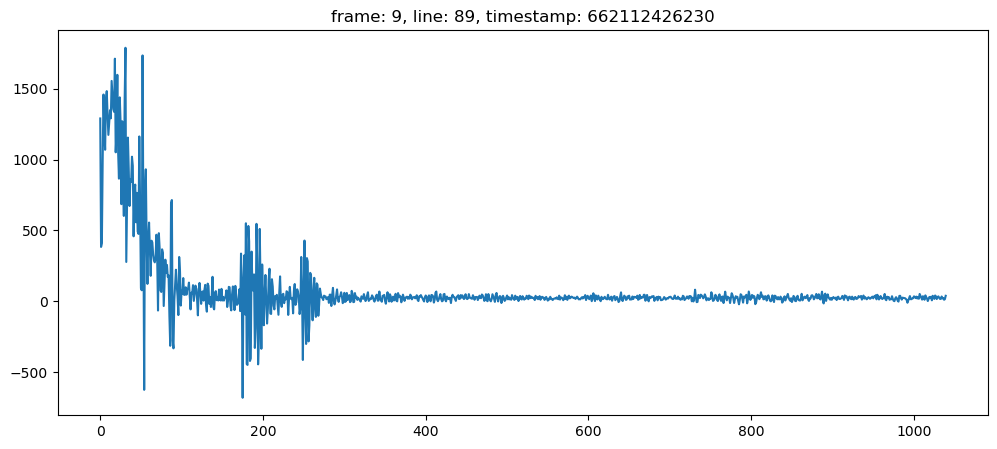

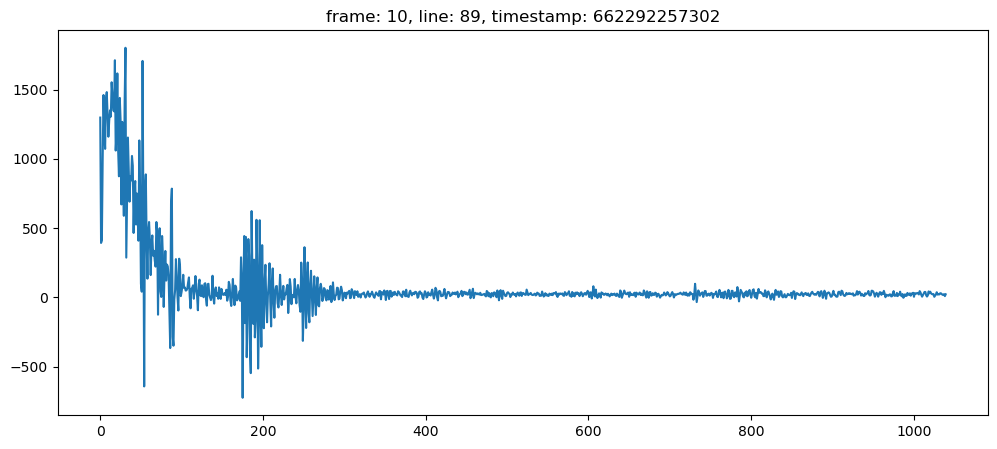

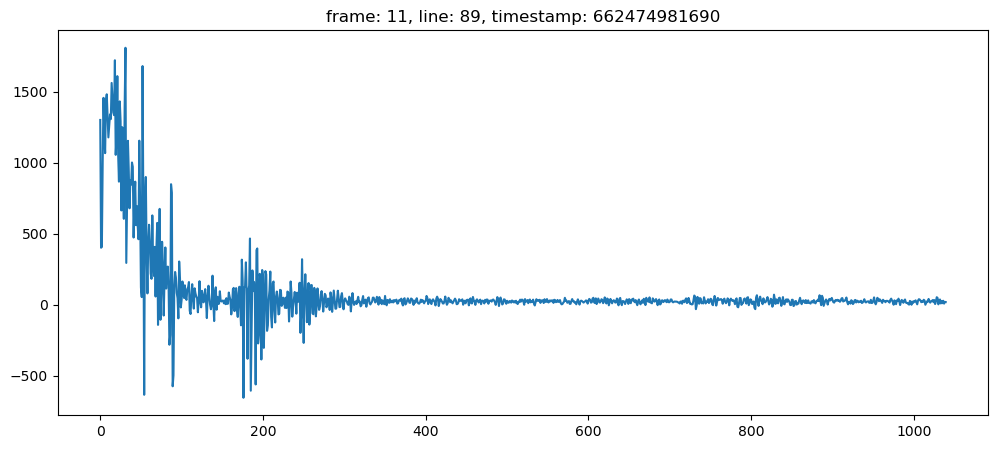

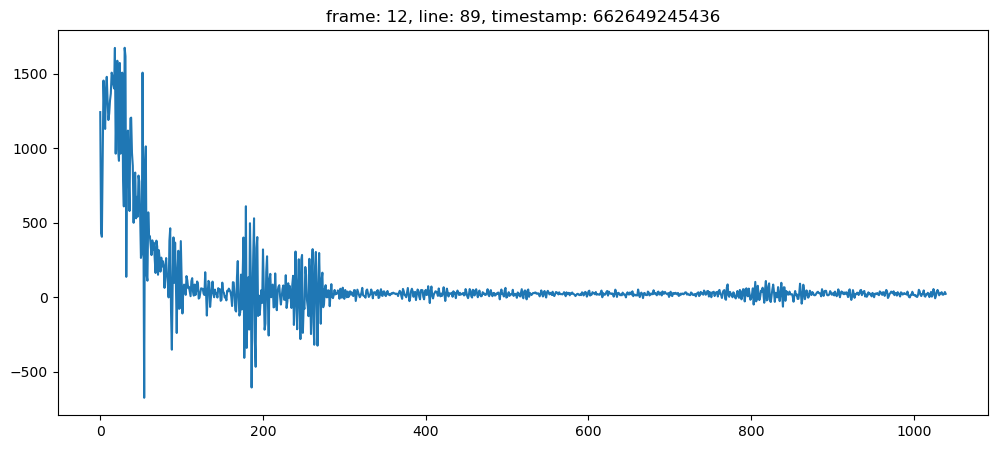

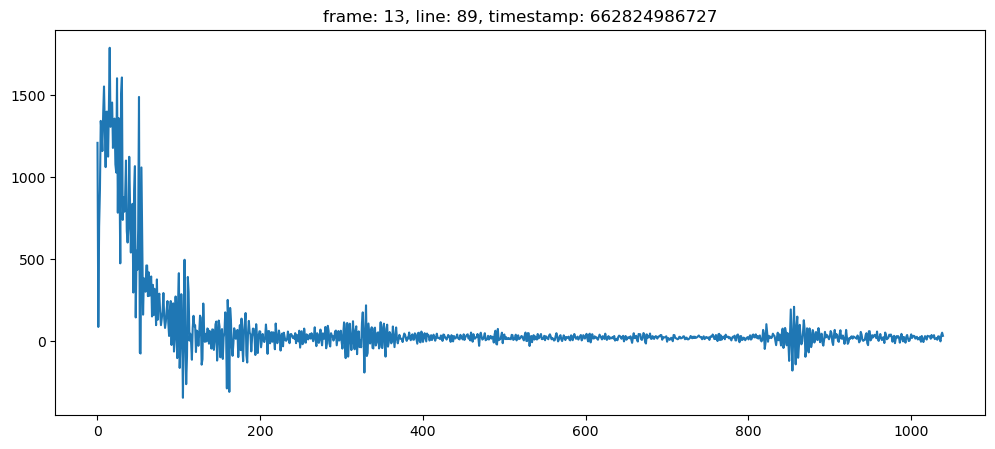

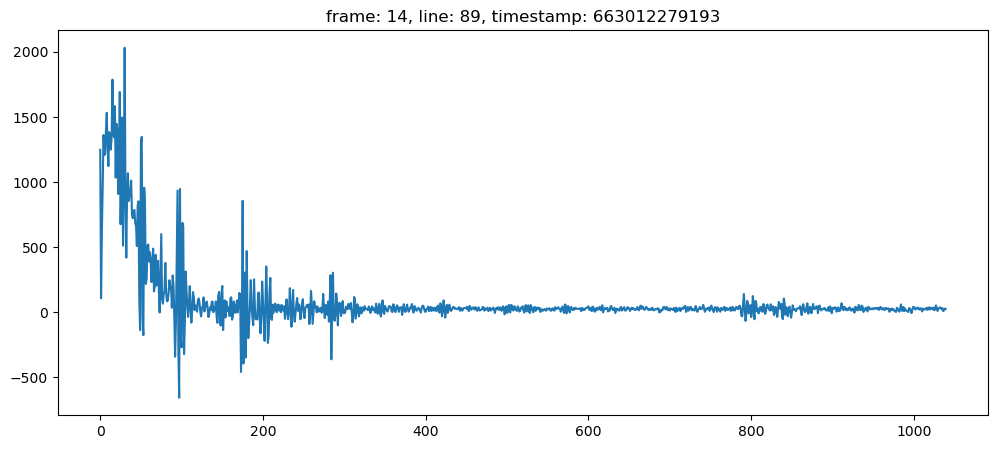

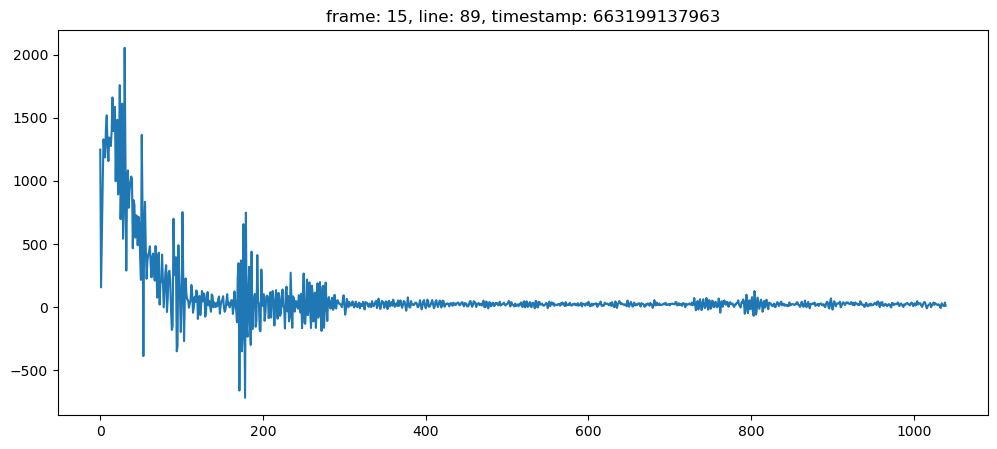

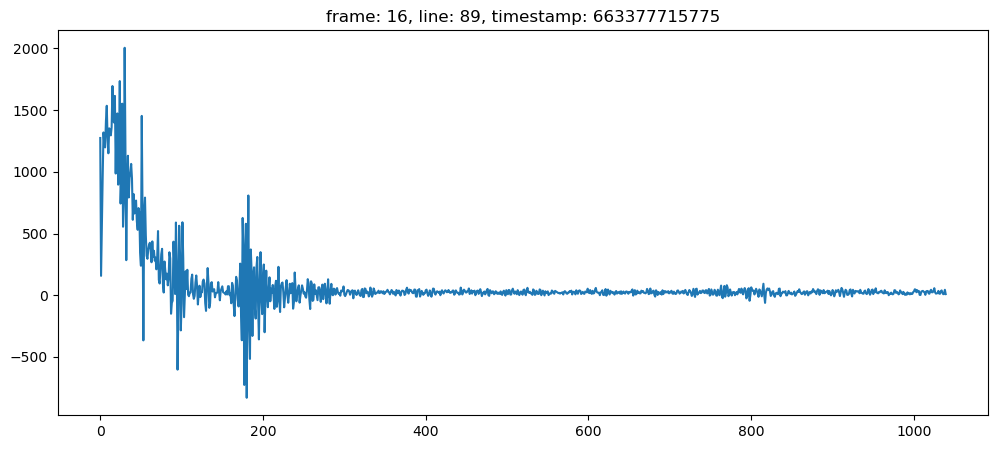

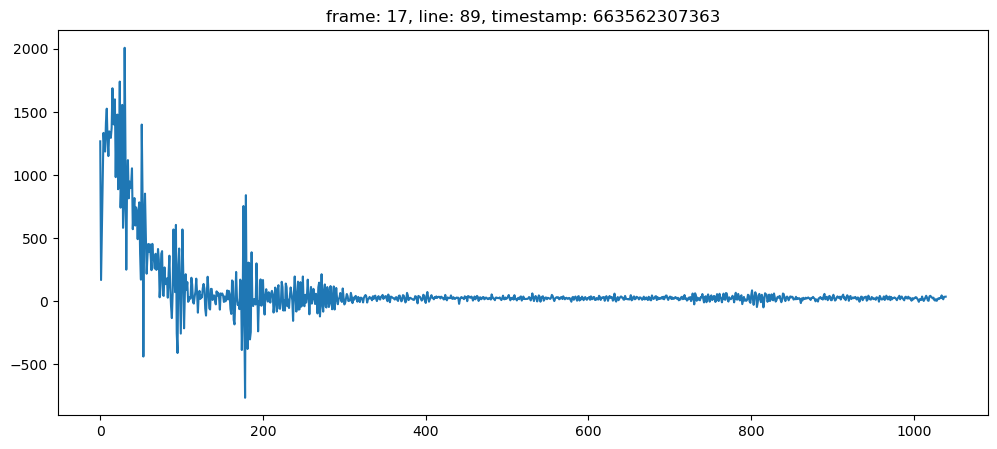

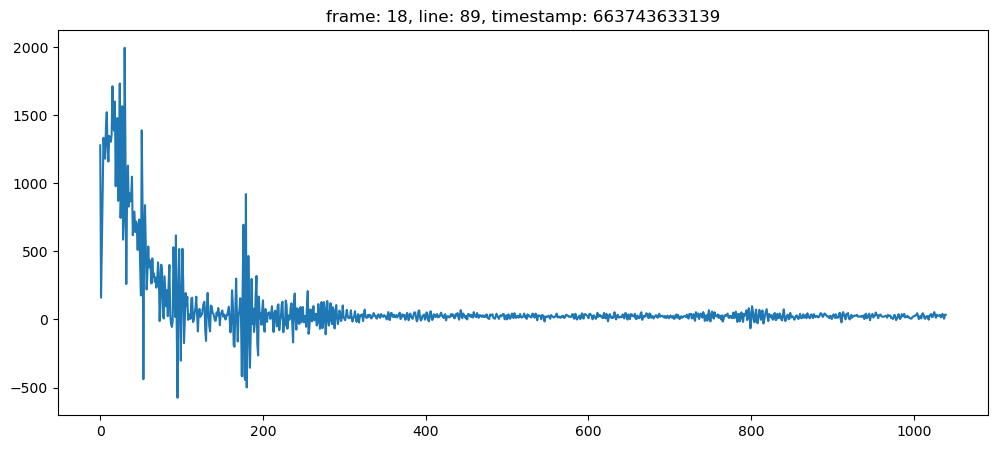

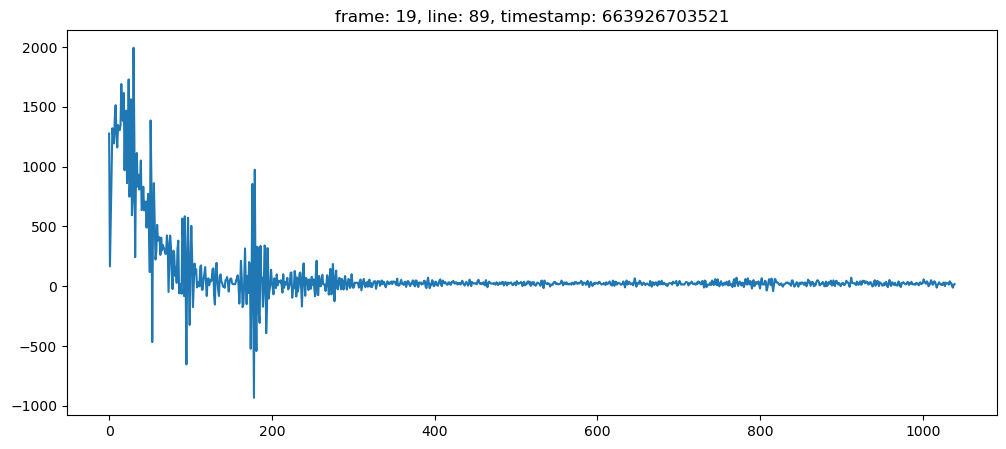

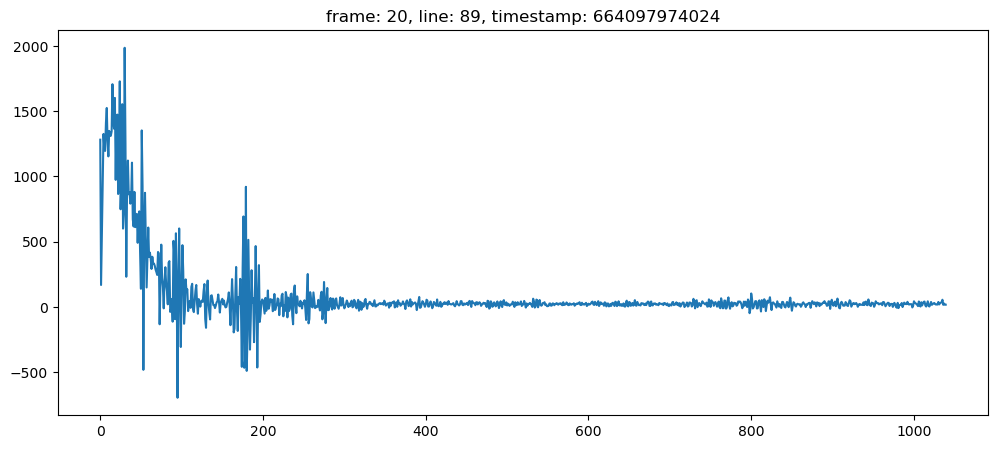

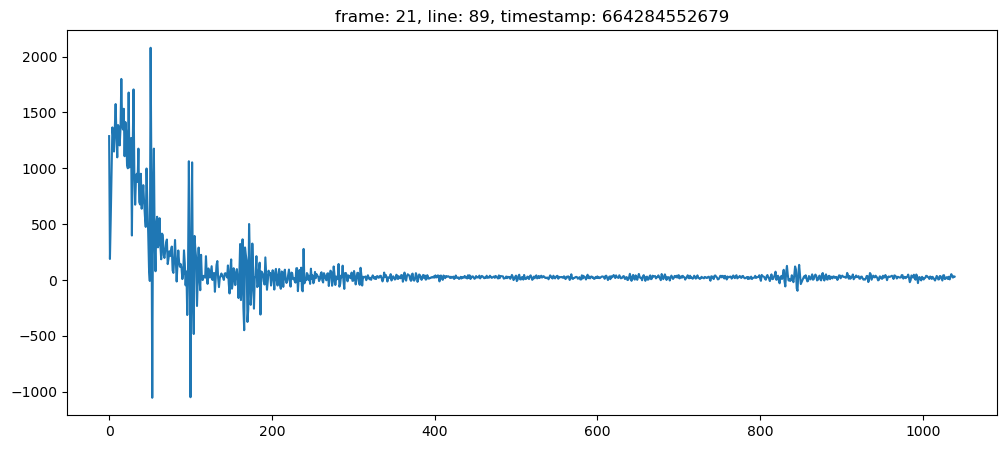

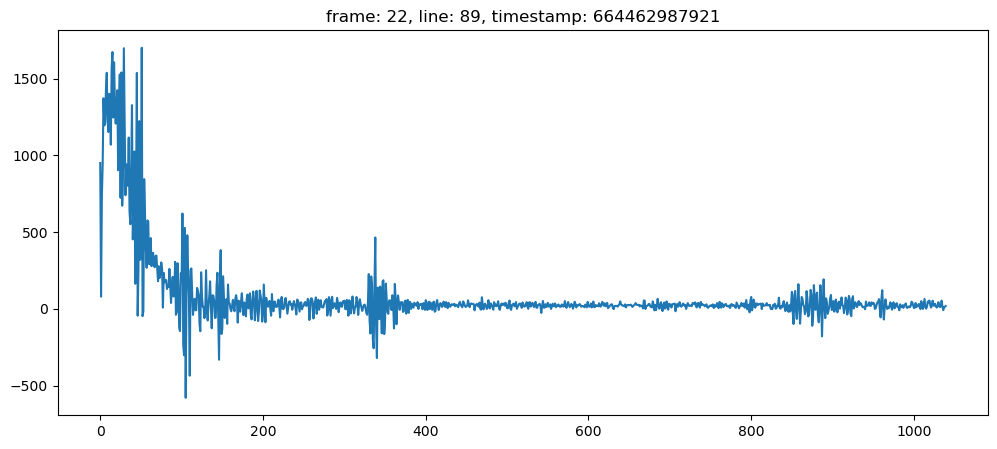

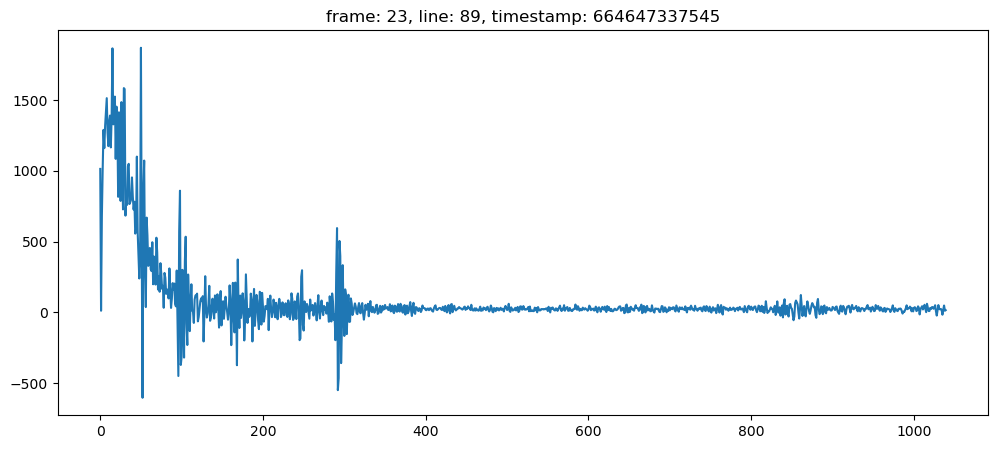

In [14]:
# data is a 3d array 
# 192 x 1168 (lines x samples) (192, 1168, 46) 46 is the number of frames


import numpy as np
import sys
from scipy.signal import hilbert
import matplotlib.pyplot as plt
import objects.rdataread as rd
import pandas as pd

# locate the path and filename
path = "../data/carotid/"
filename = "data/raw_data/test_rf.raw"

# reading header information and RF data
hdr, timestamps, data = rd.read_rf(filename)
print(timestamps.shape)
numframes = 1 #hdr['frames']

# covnert RF to B 
bdata = np.zeros((hdr['lines'], hdr['samples'], hdr['frames']), dtype='float')
for frame in range(numframes):
    bdata[:,:,frame] = 20 * np.log10( np.abs(1 + hilbert(data[:,:,frame])) )


frames = []

for frame in range(data.shape[2]):

    # Create a DataFrame from the data and add it to the list
    frames.append(pd.DataFrame(np.transpose(data[89,:,frame])))

# Concatenate all the frames into a single DataFrame
df = pd.concat(frames, axis=1)

# Save the DataFrame to a CSV file
df.to_csv("all_frames.csv", index=False)




    

In [13]:
import pandas as pd

# Your list of numbers
data = [1, 2, 3, 4, 5]
data2 = [1, 2, 3, 4, 5]

# Create a new DataFrame
df = pd.DataFrame(data)
df = pd.concat([df,pd.DataFrame(data2)])
df.to_csv("data/test.csv", index=False)
# View the DataFrame
print(df)

   0
0  1
1  2
2  3
3  4
4  5
0  1
1  2
2  3
3  4
4  5
